In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train= train.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test= test.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
#train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [2]:
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [3]:
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

train["Cabin"][train["Cabin"]!=0] = 1
test["Cabin"][test["Cabin"]!=0] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
#train["Embarked"] = train["Embarked"].fillna(train["Embarked"].median())
#train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.29985443959243085
0.6666666666666666


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


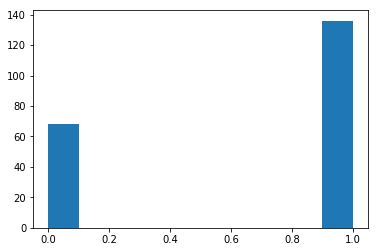

In [5]:
plt.hist(train["Survived"][train["Cabin"]==1])
print(train["Survived"][train["Cabin"]==0].mean())
print(train["Survived"][train["Cabin"]==1].mean())
survived_cabin_mean =  train["Survived"][train["Cabin"]==1].mean()
non_survived_cabin_mean =  train["Survived"][train["Cabin"]==0].mean()
train["Cabin"][train["Cabin"]!=0] = survived_cabin_mean
train["Cabin"][train["Cabin"]==0] = non_survived_cabin_mean
test["Cabin"][test["Cabin"]!=0] = survived_cabin_mean
test["Cabin"][test["Cabin"]==0] = non_survived_cabin_mean

In [6]:
max_age = train["Age"].max()
train["Age"] = [age/max_age for age in train["Age"]]
test["Age"] = [age/max_age for age in test["Age"]]

max_fare = train["Fare"].max()
train["Fare"] = [fare/max_fare for fare in train["Fare"]]
test["Fare"] = [fare/max_fare for fare in test["Fare"]]

max_parch = test["Parch"].max()
train["Parch"] = [parch/max_parch for parch in train["Parch"]]
test["Parch"] = [parch/max_parch for parch in test["Parch"]]

max_sibsp = train["SibSp"].max()
train["SibSp"] = [parch/max_sibsp for parch in train["SibSp"]]
test["SibSp"] = [parch/max_sibsp for parch in test["SibSp"]]

train["Pclass"] = [1/pclass for pclass in train["Pclass"]]
test["Pclass"] = [1/pclass for pclass in test["Pclass"]]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null float64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null float64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 36.0+ KB


In [9]:
train.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Embarked'],  axis=1, inplace=True)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,0.333333,0,0.2750,0.125,0.0,0.014151,0.299854
1,2,1,1.000000,1,0.4750,0.125,0.0,0.139136,0.666667
2,3,1,0.333333,1,0.3250,0.000,0.0,0.015469,0.299854
3,4,1,1.000000,1,0.4375,0.125,0.0,0.103644,0.666667
4,5,0,0.333333,0,0.4375,0.000,0.0,0.015713,0.299854


In [11]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,0.333333,0,0.43125,0.000,0.000000,0.015282,0.299854
1,893,0.333333,1,0.58750,0.125,0.000000,0.013663,0.299854
2,894,0.500000,0,0.77500,0.000,0.000000,0.018909,0.299854
3,895,0.333333,0,0.33750,0.000,0.000000,0.016908,0.299854
4,896,0.333333,1,0.27500,0.125,0.111111,0.023984,0.299854


In [12]:
x_train = train.drop(['PassengerId', 'Survived'],axis=1).values.astype(np.float32)
n_examples = len(x_train)
y_train = train["Survived"].values.reshape(n_examples,-1).astype(np.float32)
x_test  = test.drop('PassengerId',axis=1).values.astype(np.float32)

In [13]:
print(x_train.shape, y_train.shape, x_test.shape)

(891, 7) (891, 1) (418, 7)


In [14]:
from chainer import iterators
from chainer import datasets
train_data = datasets.TupleDataset(x_train, y_train)
train_iter = iterators.SerialIterator(train_data, batch_size = n_examples, repeat=True, shuffle=True)
valid_iter = iterators.SerialIterator(train_data, batch_size = 1, repeat=False, shuffle=False)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
import chainer
import chainer.links as L
import chainer.functions as F

class Titanic(chainer.Chain):

    def __init__(self, hidden=20, n_out=1):
        super(Titanic, self).__init__()

        with self.init_scope():
            self.l1 = L.Linear(None, hidden)
            self.l2 = L.Linear(hidden, hidden)
            self.l3 = L.Linear(hidden, n_out)
            self.l4 = L.Linear(hidden, n_out)
            self.bn1 = L.BatchNormalization(hidden)
            self.bn2 = L.BatchNormalization(hidden)


    def __call__(self, x):
        #h = self.l2(F.sigmoid(self.l1(x)))
        h = F.relu(self.l1(x))
        h = self.bn1(h)
        h = F.relu(self.l2(h))
        h = self.bn2(h)
        h = self.l3(h)
        #h = F.relu(self.l3(h))
        #h = self.l4(h)
        return h

gpu_id = 0  

net = Titanic()

if gpu_id >= 0:
    net.to_gpu(gpu_id)

In [16]:
from chainer import training
from chainer import optimizers
from chainer import optimizer
net = L.Classifier(net, lossfun=F.mean_squared_error)
net.compute_accuracy = False
optimizer = optimizers.SGD(lr=0.01).setup(net)
optimizer.add_hook(chainer.optimizer.WeightDecay(0.0))

updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)
max_epoch = 1000

trainer = training.Trainer(updater, (max_epoch, 'epoch'), out='result')


In [17]:
from chainer.training import extensions

trainer.extend(extensions.LogReport())
trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
trainer.extend(extensions.Evaluator(valid_iter, net, device=gpu_id), name='val')
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'elapsed_time']))
trainer.extend(extensions.PlotReport(['main/loss'], x_key='epoch', file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy'], x_key='epoch', file_name='accuracy.png'))
trainer.extend(extensions.dump_graph('main/loss'))

In [ ]:
trainer.run()

In [51]:
from chainer import serializers
infer_net = Titanic()
serializers.load_npz(
    'result/snapshot_epoch-500',
    infer_net, path='updater/model:main/predictor/')

In [52]:
train_pred = infer_net(x_train).data
print(train_pred.max())
print(train_pred.min())
train_pred = train_pred.reshape(len(x_train))
train_mean =train_pred.mean()
train_pred[train_pred > train_mean] = 1
train_pred[train_pred <= train_mean] = 0

score = 0
for i, j in zip(train_pred, y_train):
    if i == j:
        score = score + 1
score = score / len(x_train)
print(score)

1.233559
-0.3752792
0.8260381593714927


In [53]:
test_pred = infer_net(x_test).data
print(test_pred.max())
print(test_pred.min())
test_pred = test_pred.reshape(len(x_test))
test_mean = test_pred.mean()
test_pred[test_pred > test_mean] = 1
test_pred[test_pred <= test_mean] = 0
print(test_pred)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": test_pred.astype(np.int32)
    })
submission.to_csv('titanic.csv', index=False)

1.2916598
-2.16866
[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1